In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [32]:
hue_order = ["256x256", "512x512", "768x768", "1024x1024"]

In [33]:
# collect existing results

dfs = []
for file in os.listdir("./results/"):
    if file.endswith(".csv"):
        df = pd.read_csv(f"./results/{file}")
        dfs.append(df)

df = pd.concat(dfs)
df["Image size"] = df["size"].astype(str) + "x" + df["size"].astype(str)
# df.to_csv("results/baseline_timings.csv", index=False)

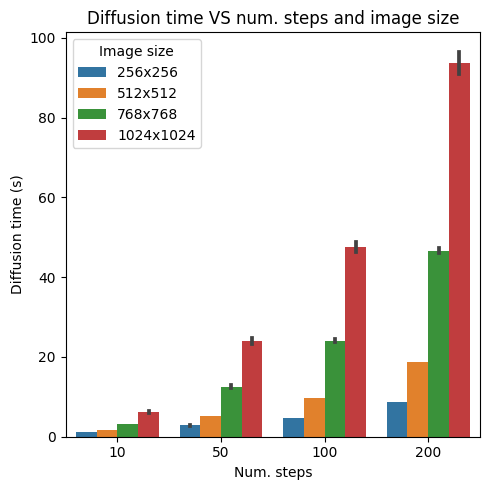

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=df, x="steps", y="total_time", hue="Image size", hue_order=hue_order, ax=ax)
ax.set_title("Diffusion time VS num. steps and image size")
ax.set_xlabel("Num. steps")
ax.set_ylabel("Diffusion time (s)")
fig.tight_layout()
fig.savefig("results/diffusion_time_vs_steps_and_size.png", dpi=300)

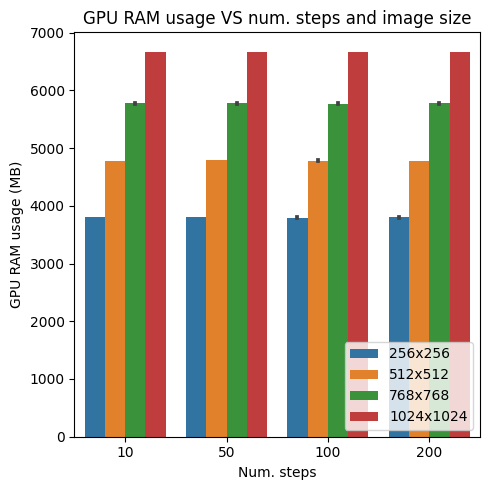

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=df, x="steps", y="peak_gpu_ram", hue="Image size", hue_order=hue_order, ax=ax)
ax.set_title("GPU RAM usage VS num. steps and image size")
ax.set_xlabel("Num. steps")
ax.set_ylabel("GPU RAM usage (MB)")
fig.tight_layout()
ax.legend(loc="lower right")
fig.savefig("results/gpu_ram_usage_vs_steps_and_size.png", dpi=300)